# Gathering Data

In [2]:
import pandas as pd

In [4]:
df = pd.read_csv("Obesityprediction.csv")

# Data Assessment

In [7]:
df.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(8), object(9)
memory u

In [11]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [15]:
df.isnull().sum()

Gender            0
Age               0
Height            0
Weight            0
family_history    0
FAVC              0
FCVC              0
NCP               0
CAEC              0
SMOKE             0
CH2O              0
SCC               0
FAF               0
TUE               0
CALC              0
MTRANS            0
Obesity           0
dtype: int64

# Data Visualization

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Weight'}>],
       [<Axes: title={'center': 'FCVC'}>,
        <Axes: title={'center': 'NCP'}>,
        <Axes: title={'center': 'CH2O'}>],
       [<Axes: title={'center': 'FAF'}>, <Axes: title={'center': 'TUE'}>,
        <Axes: >]], dtype=object)

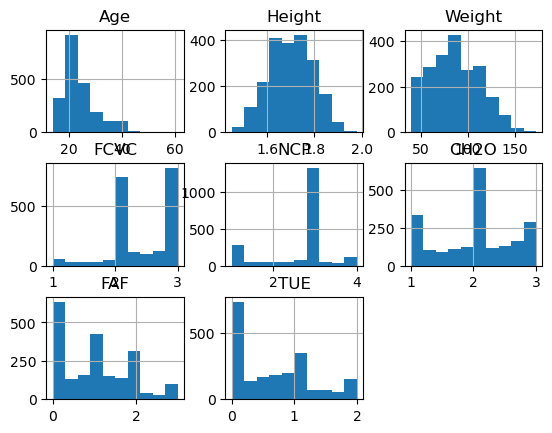

In [18]:
df.hist()

# Data Preparing

In [23]:
# Define categorical and numerical features
categorical_features = ['Gender', 'family_history', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
numerical_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [27]:
# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

In [29]:
# Define target variable
X = df.drop(columns=['Obesity'])
y = df['Obesity']

In [31]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating Naive Bayes Pipeline

In [35]:
nb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GaussianNB())
])

### Training Pipeline

In [57]:
nb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'Height', 'Weight',
                                                   'FCVC', 'NCP', 'CH2O', 'FAF',
                                                   'TUE']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'family_history',
                                                   'FAVC', 'CAEC', 'SMOKE',
                                                   'SCC', 'CALC',
                                                   'MTRANS'])])),
                ('classifier', GaussianNB())])

In [59]:
y_pred_nb = nb_pipeline.predict(X_test)

### Evaluating Model

Naive Bayes Performance:
Accuracy: 0.5441640378548895


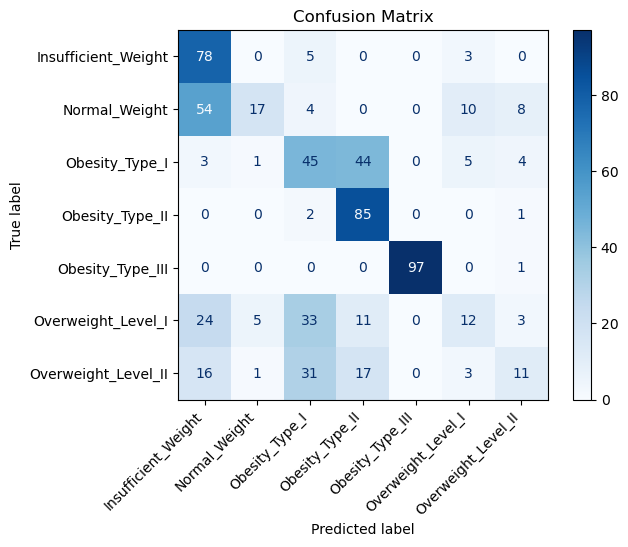

Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.45      0.91      0.60        86
      Normal_Weight       0.71      0.18      0.29        93
     Obesity_Type_I       0.38      0.44      0.41       102
    Obesity_Type_II       0.54      0.97      0.69        88
   Obesity_Type_III       1.00      0.99      0.99        98
 Overweight_Level_I       0.36      0.14      0.20        88
Overweight_Level_II       0.39      0.14      0.21        79

           accuracy                           0.54       634
          macro avg       0.55      0.54      0.48       634
       weighted avg       0.55      0.54      0.49       634



In [63]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,  ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print("Naive Bayes Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
con_m = confusion_matrix(y_test, y_pred_nb)

disp = ConfusionMatrixDisplay(confusion_matrix=con_m, display_labels=nb_pipeline.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.xticks(rotation=45, ha='right')
plt.show()
print("Classification Report:\n", classification_report(y_test, y_pred_nb))

# Trying to Improve Naive Bayes Model

In [75]:
from sklearn.preprocessing import OrdinalEncoder


# Creating new Preprocessor using OrdinalEncoder Instead of OneHotEncoder
preprocessor2 = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),  
    ('cat', OrdinalEncoder(), categorical_features)  
])

In [77]:
# Create Naive Bayes Pipeline
nb_pipeline2 = Pipeline([
    ('preprocessor', preprocessor2),
    ('nb', GaussianNB(var_smoothing=1e-2))  # Adjust smoothing for More stable probability estimates
])

In [79]:
# Train Model
nb_pipeline2.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'Height', 'Weight',
                                                   'FCVC', 'NCP', 'CH2O', 'FAF',
                                                   'TUE']),
                                                 ('cat', OrdinalEncoder(),
                                                  ['Gender', 'family_history',
                                                   'FAVC', 'CAEC', 'SMOKE',
                                                   'SCC', 'CALC',
                                                   'MTRANS'])])),
                ('nb', GaussianNB(var_smoothing=0.01))])

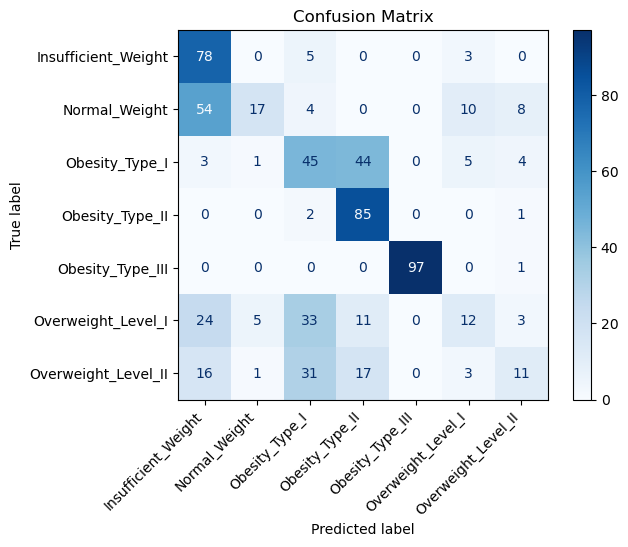

Accuracy: 0.5441640378548895
Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.45      0.91      0.60        86
      Normal_Weight       0.71      0.18      0.29        93
     Obesity_Type_I       0.38      0.44      0.41       102
    Obesity_Type_II       0.54      0.97      0.69        88
   Obesity_Type_III       1.00      0.99      0.99        98
 Overweight_Level_I       0.36      0.14      0.20        88
Overweight_Level_II       0.39      0.14      0.21        79

           accuracy                           0.54       634
          macro avg       0.55      0.54      0.48       634
       weighted avg       0.55      0.54      0.49       634



In [81]:
# Predictions
y_pred = nb_pipeline.predict(X_test)

# Evaluate Model
con_m = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=con_m, display_labels=nb_pipeline2.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.xticks(rotation=45, ha='right')
plt.show()
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Creating SoftMax Pipeline

In [52]:
softmax_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(C=30, max_iter=10000, random_state=42))
])

### Training SoftMax Model

In [55]:
softmax_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'Height', 'Weight',
                                                   'FCVC', 'NCP', 'CH2O', 'FAF',
                                                   'TUE']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'family_history',
                                                   'FAVC', 'CAEC', 'SMOKE',
                                                   'SCC', 'CALC',
                                                   'MTRANS'])])),
                ('classifier',
                 LogisticRegression(C=30, max_iter=10000, random_state=42))])

In [65]:
y_pred_softmax = softmax_pipeline.predict(X_test)

### Evaluating Softmax Model


Softmax Regression Performance:
Accuracy: 0.9479495268138801


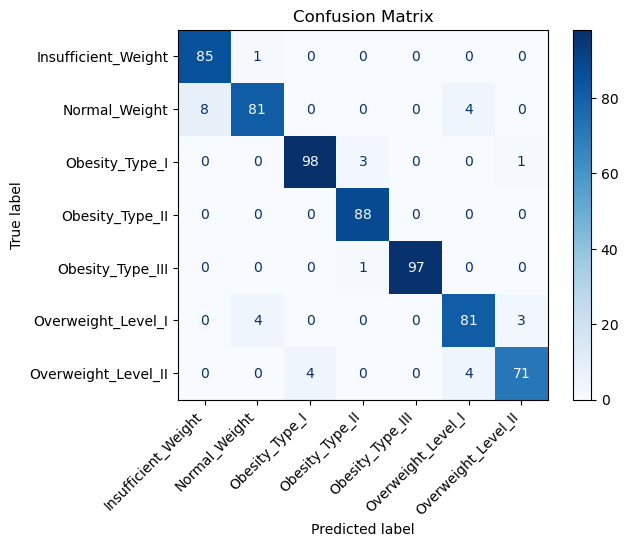

Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.91      0.99      0.95        86
      Normal_Weight       0.94      0.87      0.91        93
     Obesity_Type_I       0.96      0.96      0.96       102
    Obesity_Type_II       0.96      1.00      0.98        88
   Obesity_Type_III       1.00      0.99      0.99        98
 Overweight_Level_I       0.91      0.92      0.92        88
Overweight_Level_II       0.95      0.90      0.92        79

           accuracy                           0.95       634
          macro avg       0.95      0.95      0.95       634
       weighted avg       0.95      0.95      0.95       634



In [67]:
print("\nSoftmax Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_softmax))
con_m = confusion_matrix(y_test, y_pred_softmax)

disp = ConfusionMatrixDisplay(confusion_matrix=con_m, display_labels=softmax_pipeline.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.xticks(rotation=45, ha='right')
plt.show()
print("Classification Report:\n", classification_report(y_test, y_pred_softmax))

# Conclusion

<br>**In this analysis, i built and compared two models: Naive Bayes and Softmax Regression, to predict obesity levels based on various health-related <br>features.**

 <br>**Naive Bayes Performance**
<br>Achieved **54% accuracy**, showing poor performance in distinguishing between different obesity levels.
<br>The model performed well for **Obesity Type III** (**100% precision & recall**), but poorly for **Overweight Levels I & II** (**precision below 40%**).
<br>Due to the independence assumption of Naive Bayes, it **struggled with correlated features such as weight, height, and age.**
<br> **Softmax Regression Performance**
<br>Significantly outperformed Naive Bayes with **95% accuracy.**
<br>Achieved **high precision, recall, and F1-scores across all classes, indicating better generalization.**
<br>This improvement is likely due to Softmax Regression's ability to model complex decision boundaries and interactions between features.
<br>**Final Verdict**
<br>Softmax Regression is the superior model for this dataset. Even after optimizing Naive Bayes with feature scaling and encoding, its assumptions of <br>feature independence limited its effectiveness. In contrast, Softmax Regression leveraged the relationships between features more effectively, <br>leading to significantly higher classification performance.